Plot all ORFs

Plot time series of ORF for all basins and all experiments

Either 5x8 panels

or 8 panels with 5 lines; one for each basin

In [2]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys

sys.path.append('../src')
import utils as ut

In [3]:
ds = xr.open_dataset('../data/dummy.nc')

In [4]:
mpl.rcParams['lines.linewidth'] = 2.
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.left'] = .15
mpl.rcParams['figure.subplot.right'] = .99
mpl.rcParams['figure.subplot.bottom'] = .1
mpl.rcParams['figure.subplot.top'] = .95
mpl.rcParams['figure.figsize'] = (7,4)

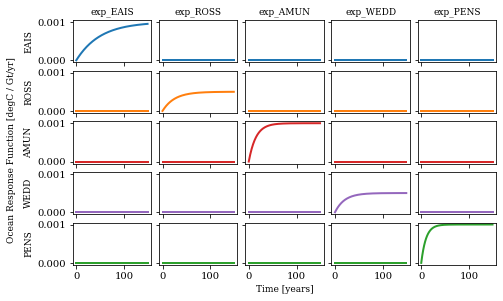

In [5]:
fig,ax = plt.subplots(5,5,sharex=True,sharey=True)
for e,ex in enumerate(ds.exp.values[:5]):
    for b,bas in enumerate(ds.basin.values):
        ax[b,e].plot(ds.rftime,ds.orf[:,e,b],c=ut.bcol[bas])
        if b==0:
            ax[b,e].set_title(f'exp_{ex}')
        if e==0:
            ax[b,e].set_ylabel(bas)
ax[-1,2].set_xlabel('Time [years]')
fig.supylabel('Ocean Response Function [degC / Gt/yr]',fontsize=9)

plt.savefig(f'../draftfigs/all_orfs.png',dpi=450)
plt.show()